The Notebook seeks to help predict the rental price of the AirBnB based of several features where the targeted value is the price. The insights provided by your predictive model could benefit both AirBnB hosts and guests. Hosts can use the insights to set competitive prices for their listings, while guests can use the insights to find the best deals on rentals. Additionally, the insights could be used by real estate investors and city planners to gain a better understanding of the housing market and make more informed decisions. 

It is not specified who the target audience is for the analysis you've been working on. It could be any person or organization that is interested in understanding the rental prices of AirBnBs based on various features. Some examples of potential target audiences could be:
-AirBnB hosts looking to set competitive prices for their listings
-AirBnB guests looking to find the best deals on rentals
-Real estate investors and city planners looking to gain a better understanding of the housing market and make more informed decisions
-Data scientists and researchers looking to explore and understand the relationship between AirBnB rental prices and various features.

# Importing Libraries

In [96]:
import pandas as pd
import numpy as np

# Importing Data

In [97]:
# import data
df = pd.read_csv('dataSP23.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Clinton Hill Apartment Single Bedroom ! Pratt ~~,30610258,Santiago,Brooklyn,Clinton Hill,40.69591,-73.96284,Private room,58,2,1,9/23/2018,0.10,1,0
1,2,Andy Phillips,6180052,Andrian,Brooklyn,Fort Greene,40.68769,-73.97490,Private room,99,5,4,9/29/2017,0.17,1,250
2,3,"Stylish, Comfortable, and Affordable in Brooklyn",5957027,Zachary,Brooklyn,Crown Heights,40.67667,-73.91750,Entire home/apt,180,2,126,6/14/2019,3.74,1,74
3,4,15 min train ride to Times Sq and US OPEN,101602599,M,Queens,Woodside,40.74340,-73.90588,Entire home/apt,50,1,95,6/24/2019,5.63,2,0
4,5,Sunny 2 bdrm Park Slope Apt w/ Yard 3min to Su...,106168581,Jason,Brooklyn,South Slope,40.66600,-73.99020,Entire home/apt,210,4,88,7/4/2019,4.41,1,20


# Data Preprocessing

removing the following columns from the dataframe because these columns are not direclty or indeirectly related to the targeted value so removing these columns would not have any effect and on the other hand these coulmns contain textual data in order to make a predictive model all the data should in numerical form

In [98]:
# drop columns id name host_id host last_review number_of_reviews last_review reviews_per_month
df = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review', 'number_of_reviews', 'last_review', 'reviews_per_month', 'neighbourhood'], axis=1)
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,40.69591,-73.96284,Private room,58,2,1,0
1,Brooklyn,40.68769,-73.97490,Private room,99,5,1,250
2,Brooklyn,40.67667,-73.91750,Entire home/apt,180,2,1,74
3,Queens,40.74340,-73.90588,Entire home/apt,50,1,2,0
4,Brooklyn,40.66600,-73.99020,Entire home/apt,210,4,1,20


In [99]:
# check for missing values
df.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [100]:
# check for duplicates
df.duplicated().sum()

0

In [101]:
# total number of rows and columns
df.shape

(27379, 8)

# Checking For Outliers

In [102]:
# function to check for outliers
def check_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]



In [103]:
# check for outliers
check_outliers(df, 'price')

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
17,Manhattan,40.75403,-73.96714,Entire home/apt,714,28,49,250
35,Manhattan,40.73722,-74.00263,Entire home/apt,1500,3,1,54
42,Manhattan,40.74478,-73.98442,Entire home/apt,349,4,1,255
56,Manhattan,40.76515,-73.98586,Entire home/apt,389,1,1,0
75,Manhattan,40.75000,-73.99637,Entire home/apt,395,3,1,0
...,...,...,...,...,...,...,...,...
27286,Manhattan,40.76955,-73.95988,Entire home/apt,589,6,1,4
27326,Brooklyn,40.65716,-73.97550,Entire home/apt,450,4,2,87
27331,Manhattan,40.71895,-73.99793,Entire home/apt,5250,1,1,0
27355,Manhattan,40.74775,-73.99167,Entire home/apt,999,2,1,0


# Result of Outliers 

Since the data contains outliers it would have a drastic effect on the model. Since Outliers are data points that are significantly different from the rest of the data, and they can skew the results of the analysis. Therefore the accuracy of the model would be effected

In [104]:
print(df['room_type'].unique())

['Private room' 'Entire home/apt' 'Shared room']


# Label Encoding for converting textual data into numerical data

converting the following columns into numerical data since predictive model can only have numerical data and the following columns are directly related to the rental price of the AirBnB. Therefore we can not drop these columns 

In [105]:
# encode categorical variables using label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['neighbourhood_group'] = le.fit_transform(df['neighbourhood_group'])
df['room_type'] = le.fit_transform(df['room_type'])

df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,1,40.69591,-73.96284,1,58,2,1,0
1,1,40.68769,-73.97490,1,99,5,1,250
2,1,40.67667,-73.91750,0,180,2,1,74
3,3,40.74340,-73.90588,0,50,1,2,0
4,1,40.66600,-73.99020,0,210,4,1,20


# Spilitting Data into Test and Train set

In [106]:
# split data into 3 sets: train, test and safe 

from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_safe, y_train, y_safe = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scaling the Data

In [107]:
# scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Model of the Data

In [108]:
# train model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Prediction on the Trained Model

In [109]:
# predict
y_pred = regressor.predict(X_test)
y_pred  

array([210.6844566 ,  51.15298343, 101.60682415, ..., 197.74822245,
       262.05795566, 261.34864079])

# Accuracy of the Model

In [110]:
# evaluate model
from sklearn.metrics import r2_score

print('R2 score: ', r2_score(y_test, y_pred))

R2 score:  0.14161210720671646


accuracy of the model is affected since there wer alot of outliers in the dataset. Applying any predictive model would not give have accuracy result.

In [111]:
# print the accuracy score of the model
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(100*(regressor.score(X_test, y_test))))

Accuracy of linear regression classifier on test set: 14.16


# Visualization

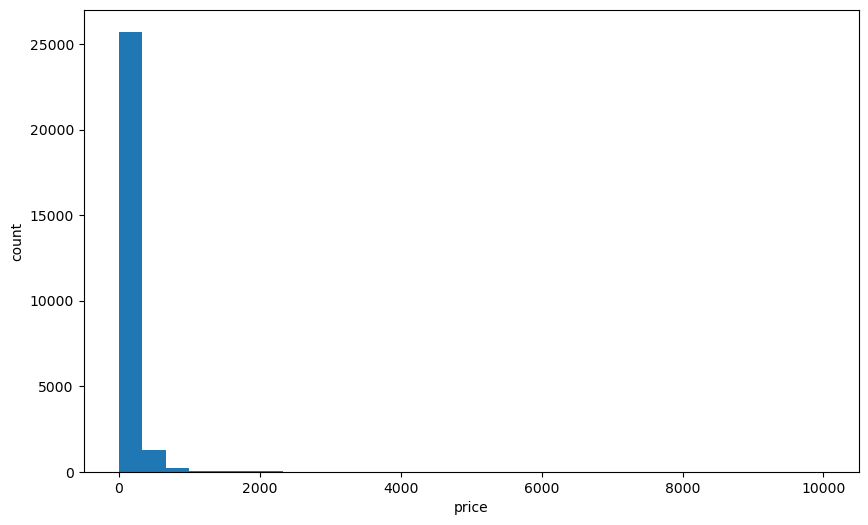

In [112]:
# exploratory data analysis
import matplotlib.pyplot as plt

# plot the distribution of price
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

<AxesSubplot: xlabel='minimum_nights', ylabel='price'>

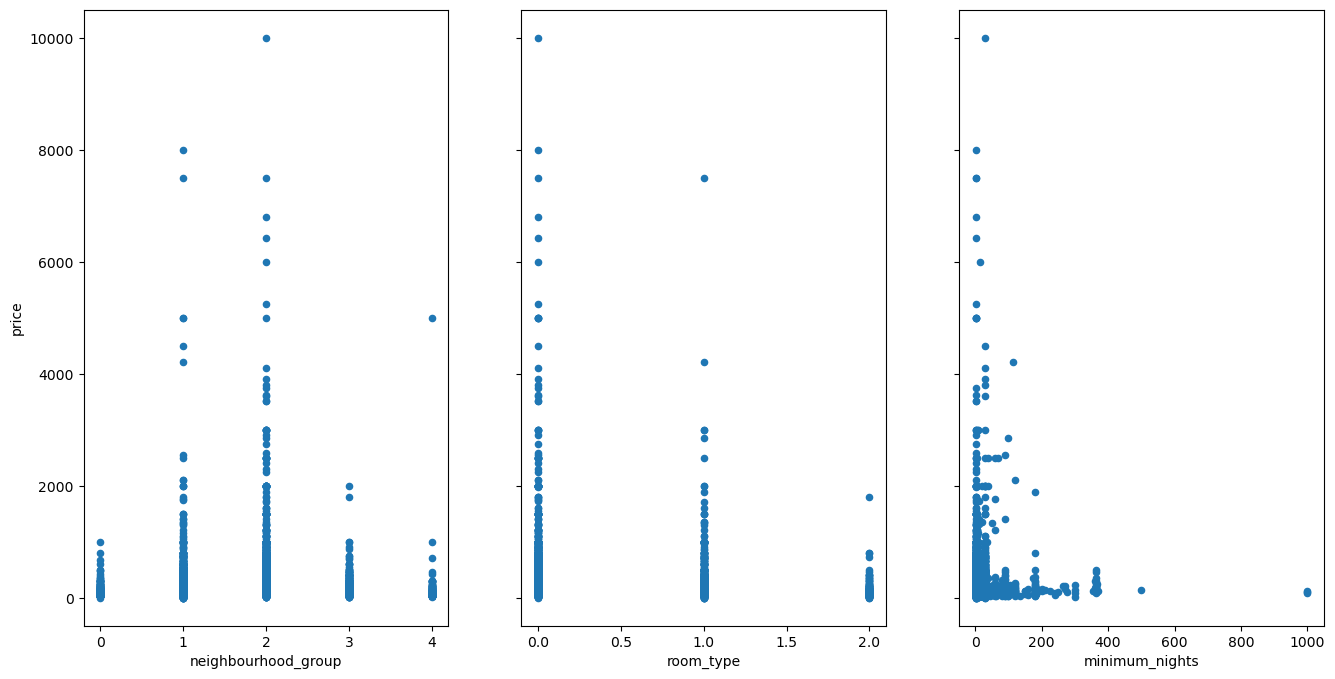

In [114]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='neighbourhood_group', y='price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='room_type', y='price', ax=axs[1])
df.plot(kind='scatter', x='minimum_nights', y='price', ax=axs[2])
 

# Summary Statistics

In [115]:
# summary statistics
df.describe()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
count,27379.000000,27379.000000,27379.000000,27379.000000,27379.000000,27379.000000,27379.000000,27379.000000
mean,1.675993,40.728836,-73.952071,0.502721,151.569561,7.056722,7.228788,113.430293
std,0.735011,0.054629,0.046278,0.544685,219.807784,20.194945,33.173634,132.039807
min,0.000000,40.506410,-74.242850,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,40.689955,-73.983080,0.000000,69.000000,1.000000,1.000000,0.000000
50%,2.000000,40.723030,-73.955700,0.000000,105.000000,3.000000,1.000000,45.000000
75%,2.000000,40.763045,-73.935830,1.000000,175.000000,5.000000,2.000000,230.000000
max,4.000000,40.913060,-73.717950,2.000000,10000.000000,999.000000,327.000000,365.000000


# The target population will benefit from the results of your analysis by gaining a better understanding of the factors that influence AirBnB rental prices. This information can be used to make more informed decisions.

For example:
-AirBnB hosts can use the insights to set competitive prices for their listings and increase their bookings and revenue.
-AirBnB guests can use the insights to find the best deals on rentals and save money on their bookings.
-Real estate investors and city planners can use the insights to gain a better understanding of the housing market and make more informed decisions about where to invest or plan for future housing developments.
-Data scientists and researchers can use the insights to explore and understand the relationship between AirBnB rental prices and various features and contribute to the research in the field.